## Write SEG-Y files with `segyio`

Let's use [Equinor's segyio project](https://github.com/Statoil/segyio) to write a SEG-Y file.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

First we'll load some data from a remote SEG-Y file.

In [3]:
import segyio

ds = np.DataSource('../data')  # <- Local target.

url = 'https://geocomp.s3.amazonaws.com/data/Penobscot_0-1000ms.sgy'

with segyio.open(ds.open(url).name) as s:
    volume = segyio.cube(s)

In [4]:
volume.shape

(601, 481, 251)

In [4]:
il, xl, ts = volume.shape

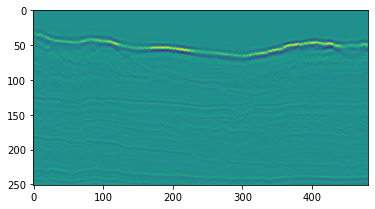

In [7]:
plt.imshow(volume[100].T)

## Write simple SEG-Y file

We have to set up a `spec` that describes the SEG-Y data. Most of it we can easily describe using the dimensions of the seismic volume.

In [11]:
spec = segyio.spec()

spec.format = 5
#spec.sorting = 2  # Not mandatory
spec.ilines = np.arange(il)
spec.xlines = np.arange(xl)
spec.samples = np.arange(ts)
#spec.tracecount = il * xl  # Not mandatory

Now we can loop over the inlines, writing them one at a time to the file (line 4, below). We also need to write the trace headers, with both the inline number (and sample interval and offset), and the crossline number (lines 11 to 14):

In [12]:
with segyio.create('../data/volume.sgy', spec) as f:
    
    f.text[0] = "Penobscot volume, subsampled 3x3."
    
    for ilno in spec.ilines:
        f.iline[ilno] = volume[ilno]
        f.header.iline[ilno] = {
            segyio.TraceField.INLINE_3D: ilno,
            segyio.TraceField.TRACE_SAMPLE_INTERVAL: 4000,  # microseconds
            segyio.TraceField.TRACE_SAMPLE_COUNT: ts,
            segyio.TraceField.offset: 0,
        }

    for xlno in spec.xlines:
        f.header.xline[xlno] = {
            segyio.TraceField.CROSSLINE_3D: xlno,
        }

Note for devs: It would be nice to be able to give an array for the headers so I can set the trace headers for a line all in one go — a kind of broadcasting. Right now I can only set the headers equal to some constant.

## Read the file we made

Let's check we can read the file and the headers we made:

In [13]:
with segyio.open('../data/volume.sgy') as f:
    print(f.text[0])
    print()
    print(f.header[321])
    data = segyio.cube(f)

bytearray(b'Penobscot volume, subsampled 3x3.\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [14]:
data.shape

(601, 481, 251)

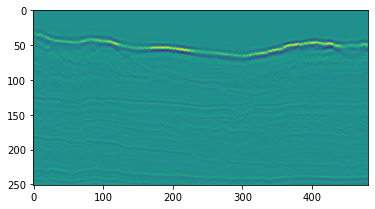

In [17]:
plt.imshow(data[100].T)

It all looks good!

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2018</p>
</div>